In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

dirs = Path.cwd() / "trained-pbmc-bert"
rolling_window = 100
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams["figure.autolayout"] = True

endofepoch = True

In [8]:
epochs = list(dirs.glob("Epoch */*.csv"))
stats = {
    "train-acc.csv": [],
    "train-loss.csv": [],
    "test-acc.csv": [],
    "test-loss.csv": [],
}
epochwisestats = {
    "train-acc.csv": [],
    "train-loss.csv": [],
    "test-acc.csv": [],
    "test-loss.csv": [],
}

for i in epochs:
    info = str(i).replace(str(dirs) + "\\", "").split("\\")
    info = [int(info[0].replace("Epoch ", "")), info[1]]
    df = pd.read_csv(i, header = None)
    if "loss" in info[1]:
        epochwisestats[info[1]].append(
            df.mean().values.tolist()[0] if not endofepoch else
              df.values[-rolling_window:].mean().tolist()
        )
    else:
        epochwisestats[info[1]].append(df.mean().values.tolist()[0])
    df = df.rolling(window = rolling_window).mean().dropna()
    stats[info[1]] += df.T.values[0].tolist()
    


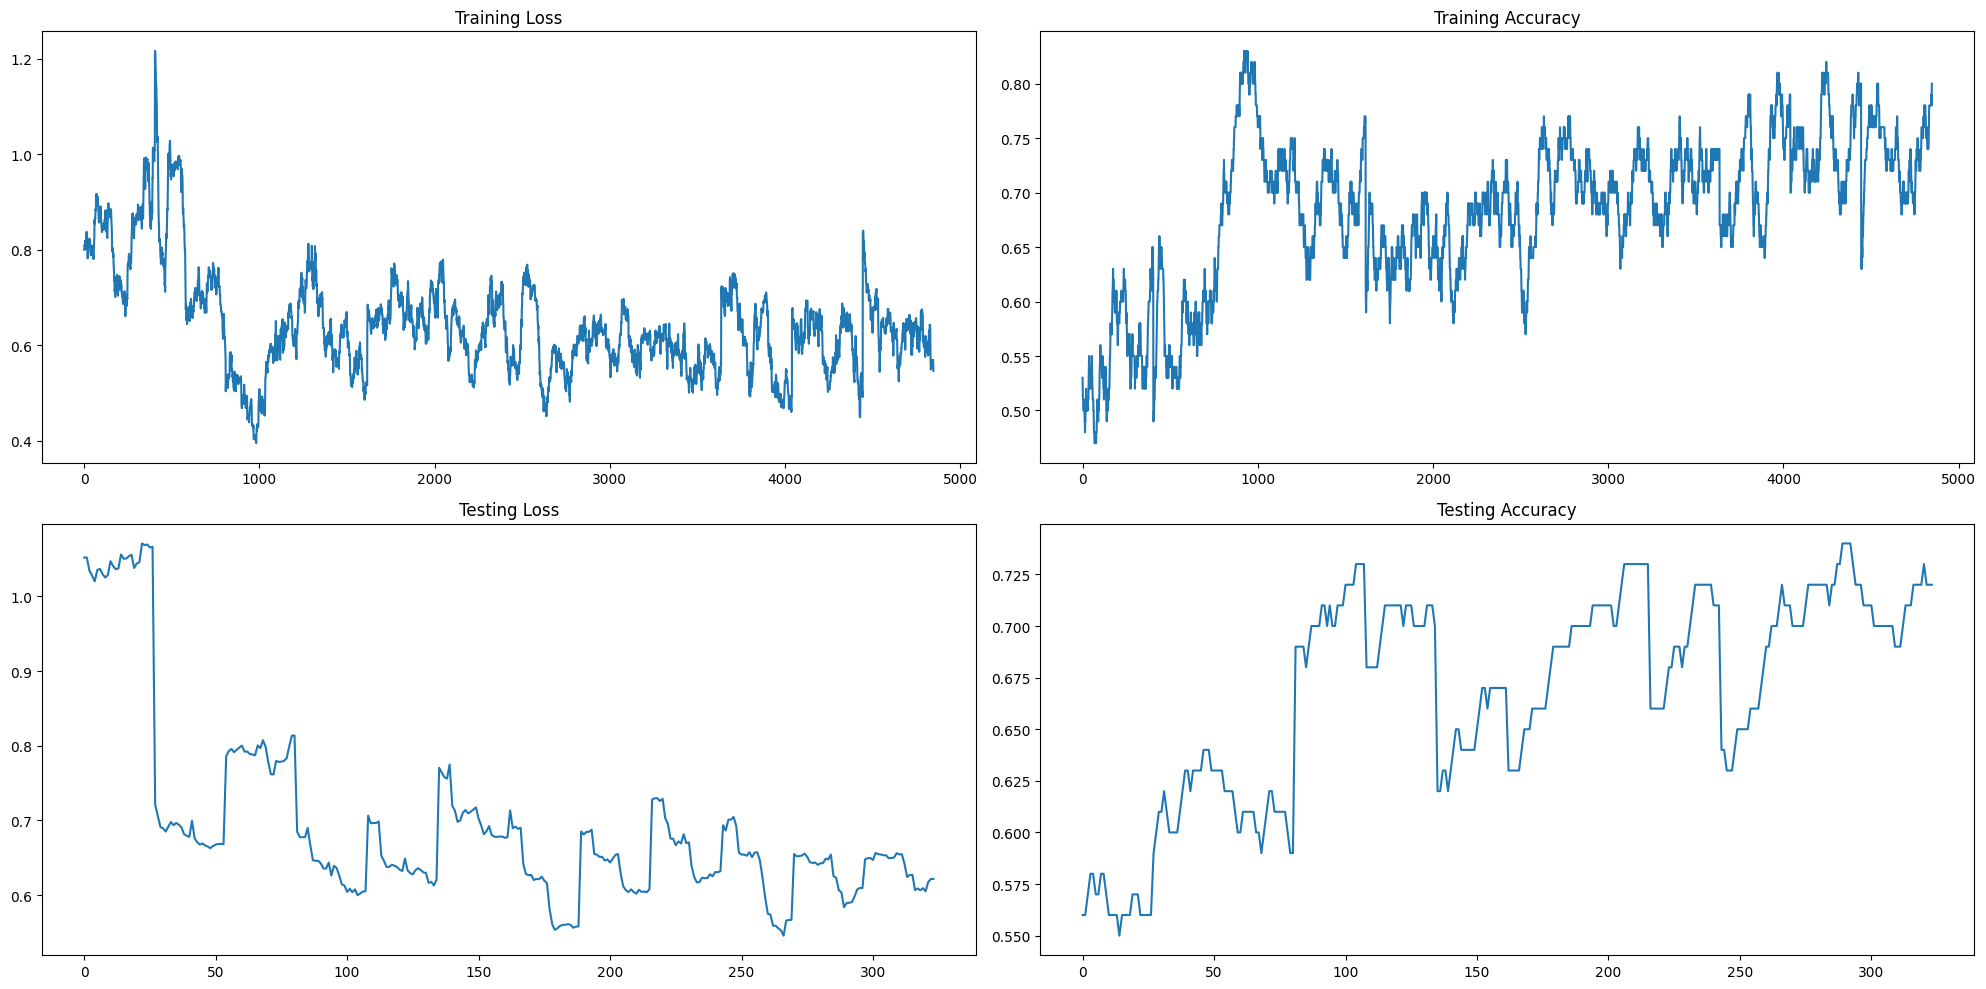

In [9]:
fig, axs = plt.subplots(ncols = 2, nrows = 2)
axs[0, 0].plot(stats["train-loss.csv"])
axs[0, 0].set_title("Training Loss")

axs[1, 0].plot(stats["test-loss.csv"])
axs[1, 0].set_title("Testing Loss")

axs[0, 1].plot(stats["train-acc.csv"])
axs[0, 1].set_title("Training Accuracy")

axs[1, 1].plot(stats["test-acc.csv"])
axs[1, 1].set_title("Testing Accuracy")

plt.show()

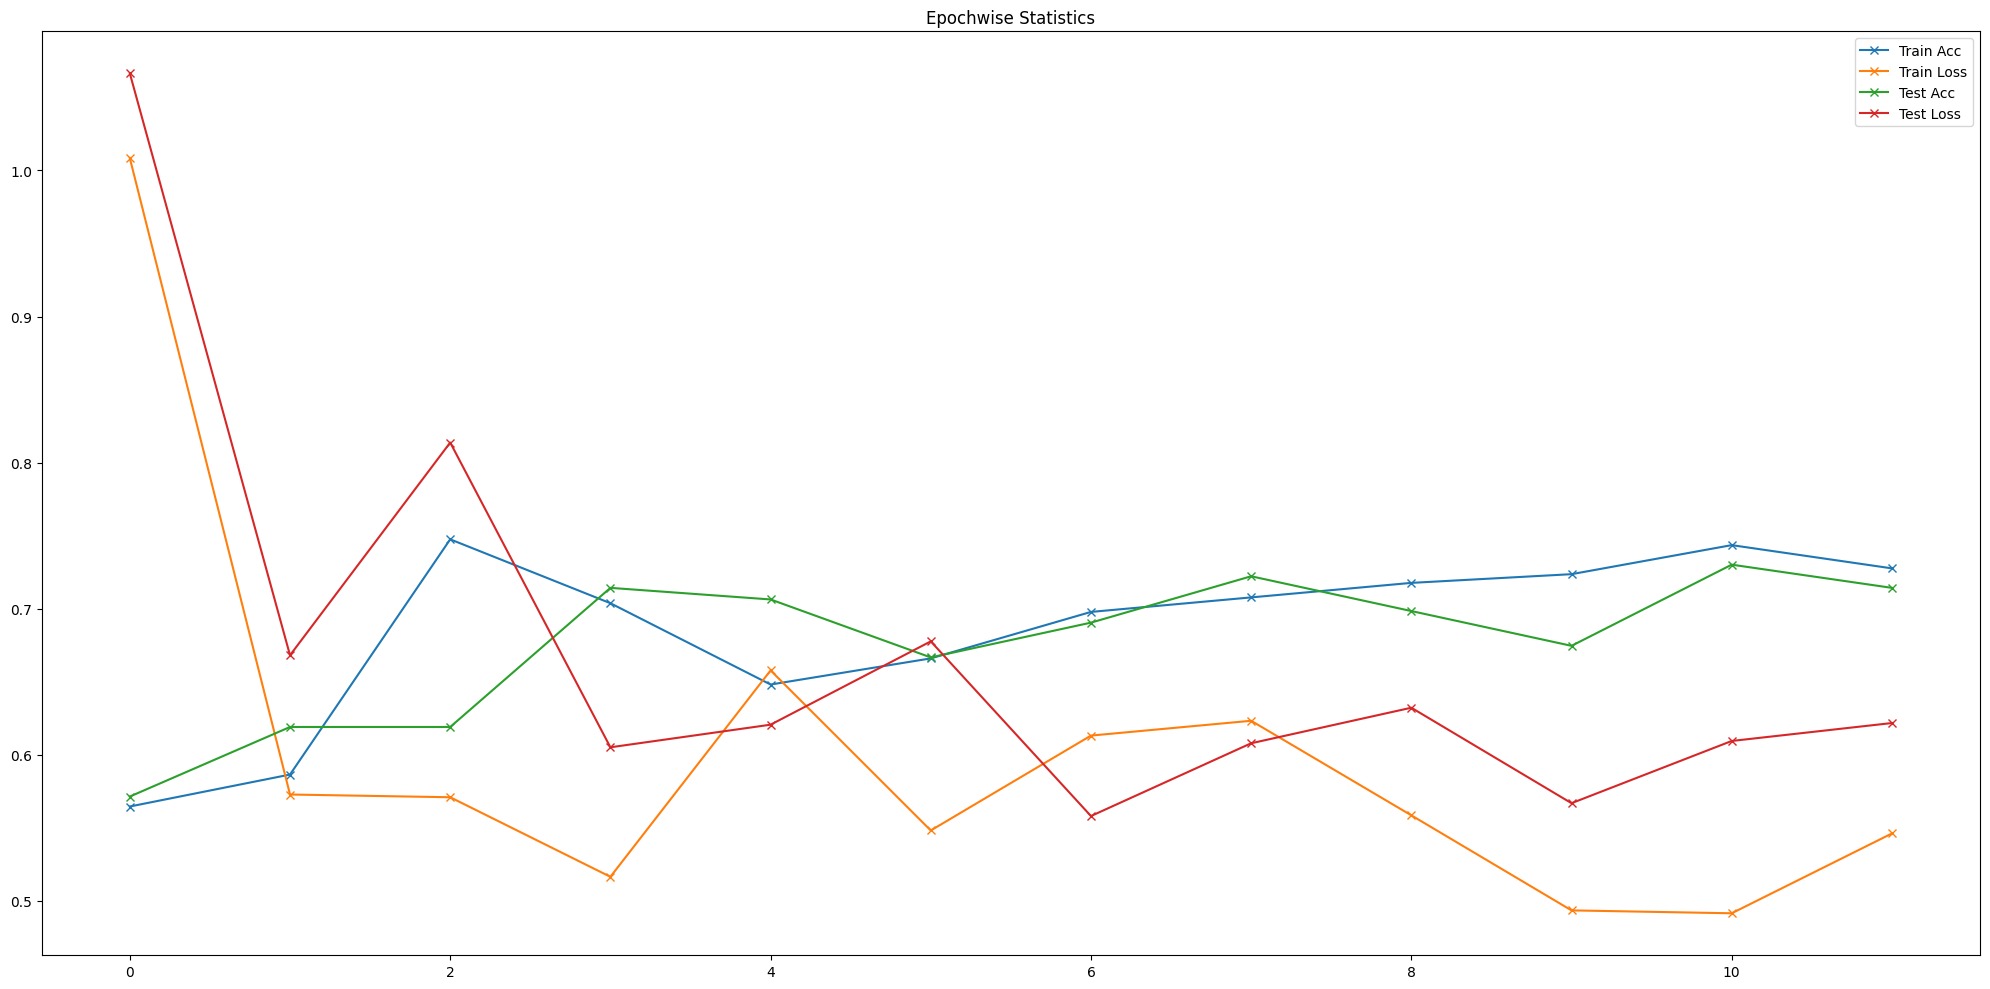

In [10]:
for key, val in epochwisestats.items():
    plt.plot(val, label = " ".join(key.replace(".csv", "").split("-")).title(), marker = "x")
plt.title("Epochwise Statistics")
plt.legend()
plt.show()

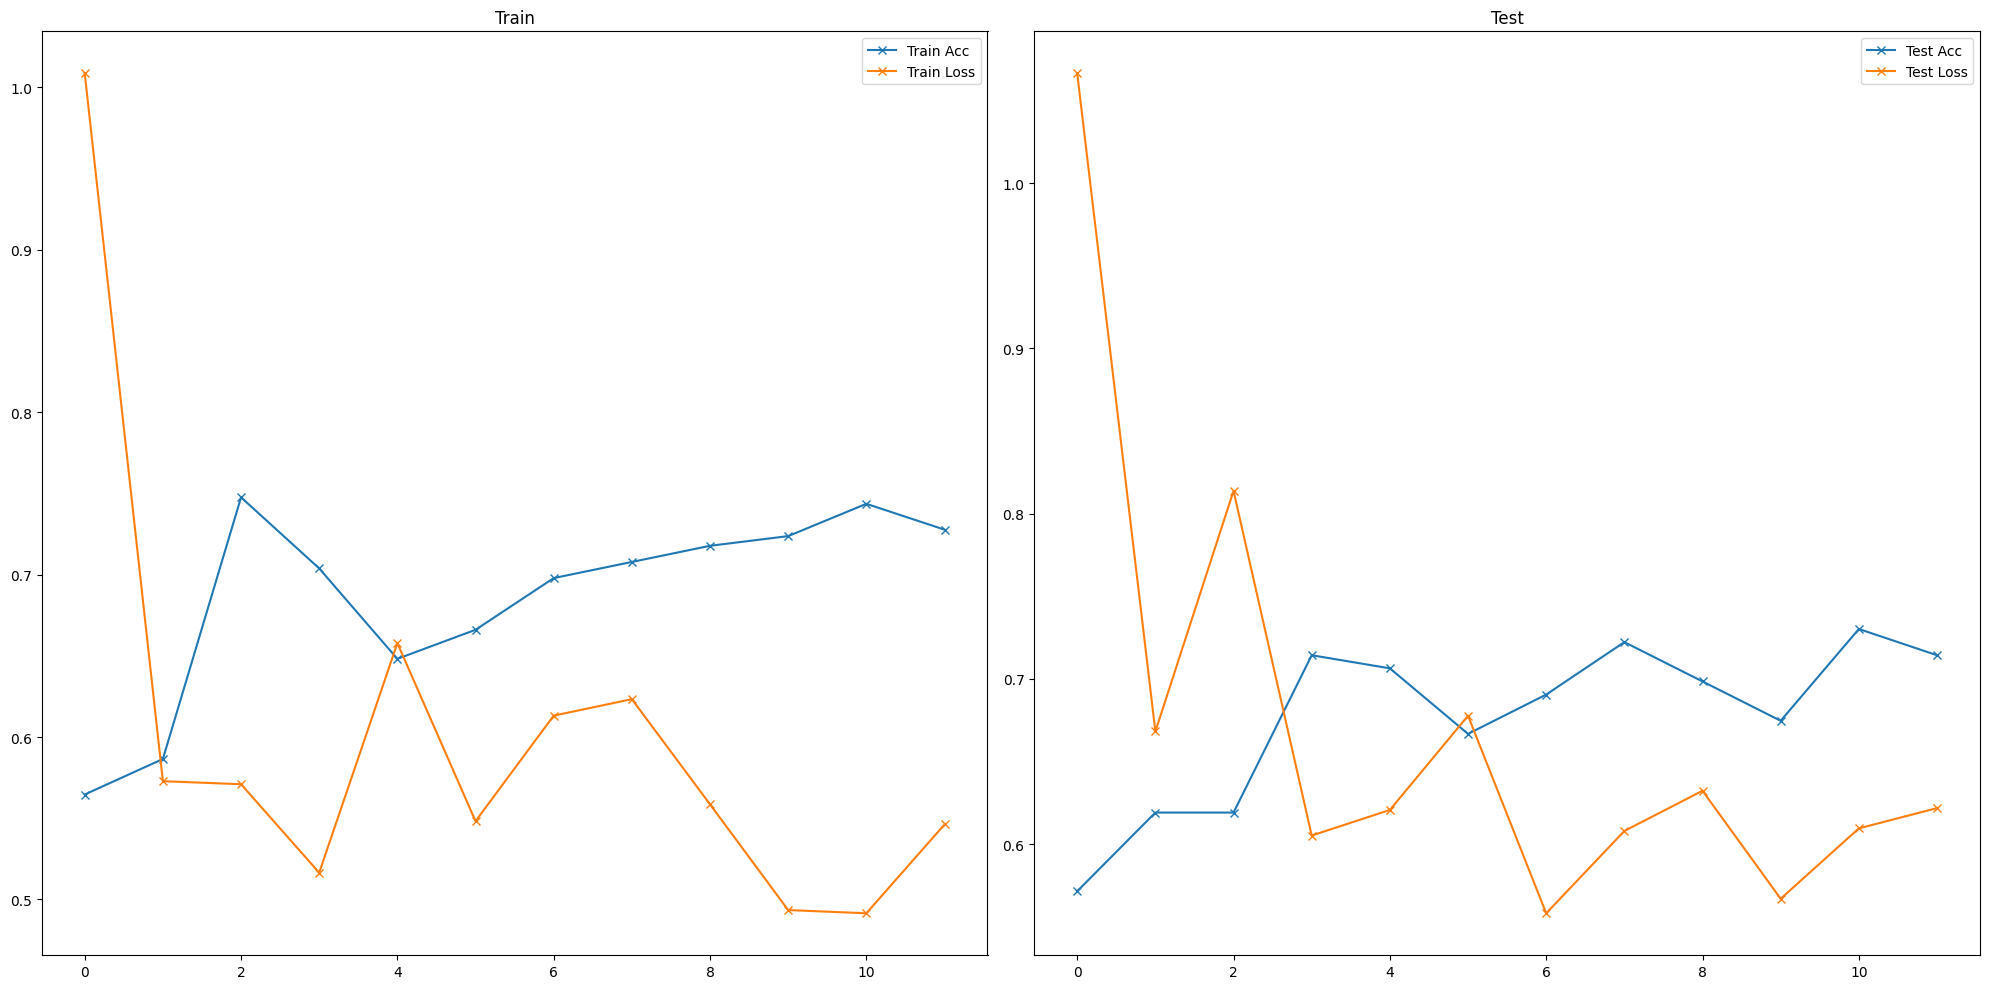

In [11]:
fig, axs = plt.subplots(ncols = 2)

for key, val in epochwisestats.items():
    axs[0 if "train" in key else 1].plot(val, label = " ".join(key.replace(".csv", "").split("-")).title(), marker = "x")
axs[0].legend()
axs[0].set_title("Train")
axs[1].legend()
axs[1].set_title("Test")
plt.show()

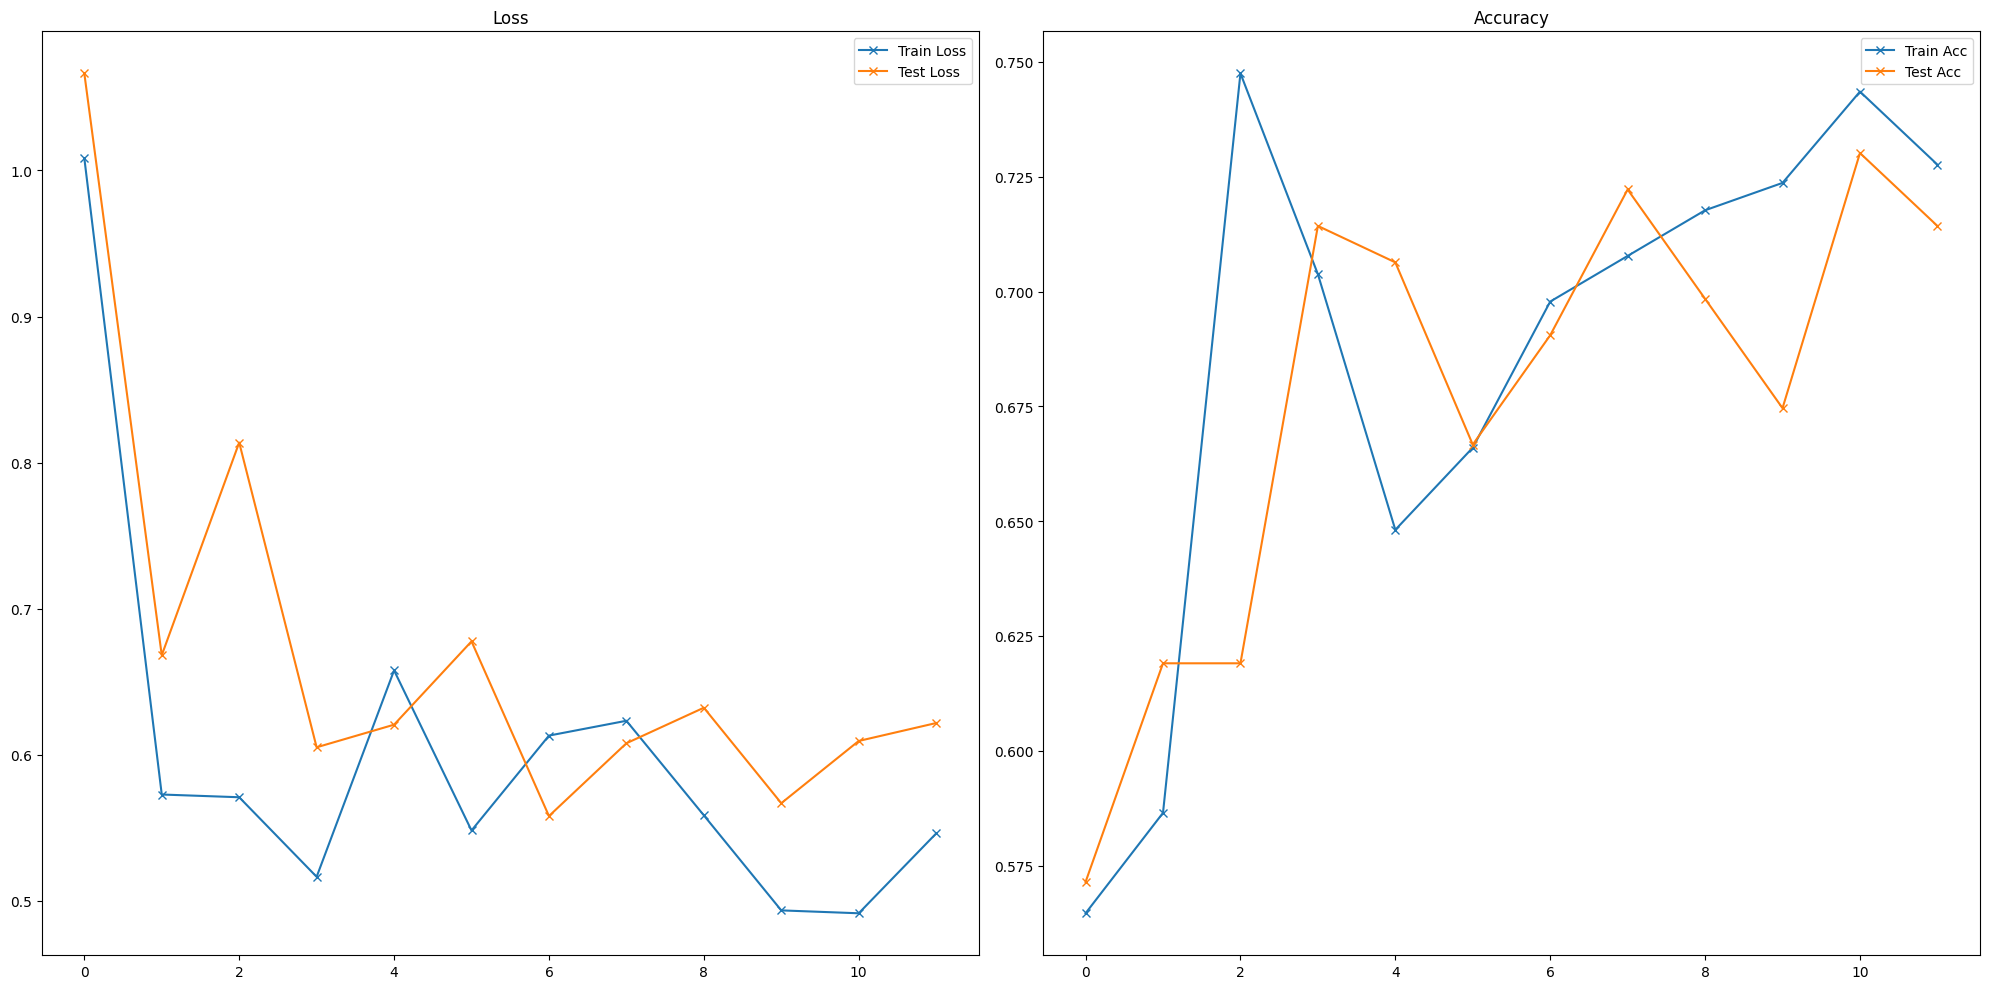

In [12]:
fig, axs = plt.subplots(ncols = 2)

for key, val in epochwisestats.items():
    axs[0 if "loss" in key else 1].plot(val, label = " ".join(key.replace(".csv", "").split("-")).title(), marker = "x")
axs[0].legend()
axs[1].legend()
axs[0].set_title("Loss")
axs[1].set_title("Accuracy")
plt.show()